In [ ]:
import  numpy as np
import matplotlib.pyplot as plt

import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.models import Sequential
from tensorflow.keras.preprocessing import image

In [ ]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255, horizontal_flip = True, zoom_range = 0.2, shear_range = 0.2
)

train_data = train_datagen.flow_from_directory(directory="/content/Covid Dataset/Train", target_size = (256,256), batch_size = 16,
                                               class_mode = 'binary'
                                               )

Found 249 images belonging to 4 classes.


In [ ]:
train_data.class_indices

{'.ipynb_checkpoints': 0, 'COVID': 1, 'Normal': 2, 'Pneumonia': 3}

In [ ]:
test_datagen = image.ImageDataGenerator(
    rescale = 1./255
)

test_data = test_datagen.flow_from_directory(directory="/content/Covid Dataset/Test", target_size = (256,256), batch_size = 16,
                                               class_mode = 'binary'
                                               )

Found 65 images belonging to 4 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape = (256,256,3)))

model.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units = 64, activation='relu'))
model.add(Dropout(rate=0.50))
model.add(Dense(units= 1, activation= 'sigmoid'))

model.compile(loss= keras.losses.binary_crossentropy, optimizer= "adam", metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 126, 126, 64)     0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 126, 126, 64)      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 124, 124, 64)      36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [ ]:
model.fit_generator(train_data, steps_per_epoch=8, epochs=10, validation_steps=2,
                    validation_data = test_data
                    )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
8/8 [==============================] - 63s 8s/step - loss: -1578.7769 - accuracy: 0.4141 - val_loss: -8337.7969 - val_accuracy: 0.3750
Epoch 2/10
8/8 [==============================] - 57s 7s/step - loss: -68456.2656 - accuracy: 0.4545 - val_loss: -239628.3438 - val_accuracy: 0.3750
Epoch 3/10
8/8 [==============================] - 56s 7s/step - loss: -701790.2500 - accuracy: 0.4711 - val_loss: -2947916.0000 - val_accuracy: 0.3750
Epoch 4/10
8/8 [==============================] - 57s 7s/step - loss: -7067682.0000 - accuracy: 0.3636 - val_loss: -16993488.0000 - val_accuracy: 0.3438
Epoch 5/10
8/8 [==============================] - 59s 7s/step - loss: -37461708.0000 - accuracy: 0.4453 - val_loss: -82583816.0000 - val_accuracy: 0.4062
Epoch 6/10
8/8 [==============================] - 59s 7s/step - loss: -154936480.0000 - accuracy: 0.4453 - val_loss: -417784768.0000 - val_accuracy: 0.1875
Epoch 7/10
8/8 [==============================] - 58s 7s/step - loss: -480131904.0000 - acc

In [ ]:
path = "/content/Covid Dataset/Validation/pic9.jpeg"
img = image.load_img(path, target_size=(224,224))

img = image.img_to_array(img)/256
img = np.array([img])
img.shape

(1, 224, 224, 3)

In [50]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [51]:
image_size = (180, 180)
batch_size = 32

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/Covid Dataset/Train",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/Covid Dataset/Test",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 249 files belonging to 4 classes.
Using 200 files for training.
Found 65 files belonging to 4 classes.
Using 13 files for validation.


In [52]:
#Illustrating the train_dataset
train_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [53]:
#Classifying train_dataset
class_names = train_dataset.class_names
print(class_names)

['.ipynb_checkpoints', 'COVID', 'Normal', 'Pneumonia']


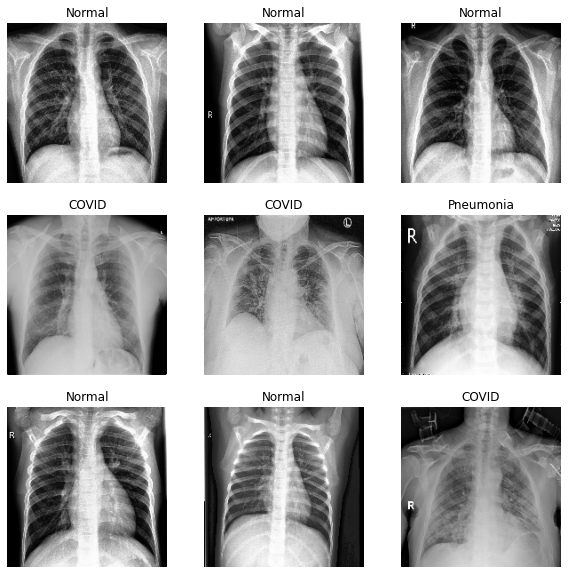

In [54]:
#Here's the first 9 Images from the dataset
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [55]:
data_augmentation = keras.Sequential(
    [
     layers.experimental.preprocessing.RandomFlip("horizontal"),
     layers.experimental.preprocessing.RandomRotation(0.05),
     layers.experimental.preprocessing.RandomZoom(0.10)
    ]
)

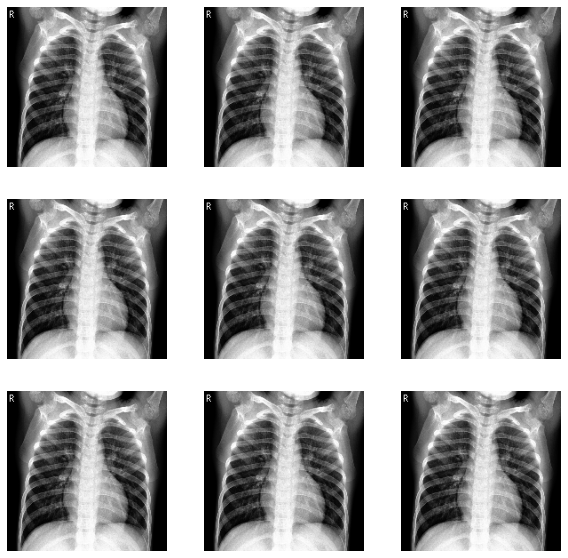

In [56]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [57]:
train_dataset = train_dataset.prefetch(buffer_size=32)
test_dataset = test_dataset.prefetch(buffer_size=32)

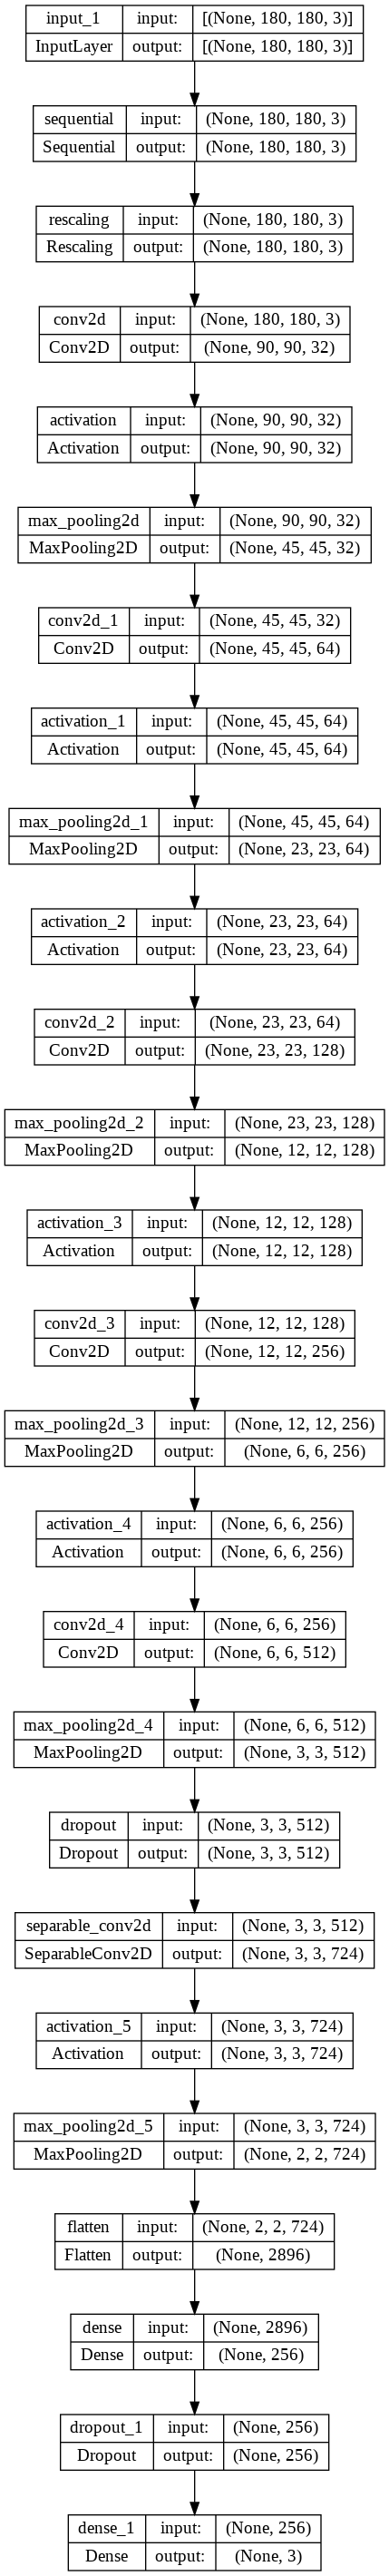

In [58]:
keras.backend.clear_session()

def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    x = data_augmentation(inputs)

    # Entry block
    x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(x)
    x = layers.Conv2D(32, 5, strides=2, padding="same")(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPool2D(3, strides=2, padding="same")(x)

    x = layers.Conv2D(64, 5, padding="same")(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPool2D(3, strides=2, padding="same")(x)

    for size in [128, 256, 512]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2D(size, 5, padding="same")(x)
        x = layers.MaxPool2D(3, strides=2, padding="same")(x)

    x = layers.Dropout(0.5)(x)
    x = layers.SeparableConv2D(724, 3, padding="same")(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPool2D(3, strides=2, padding="same")(x)

    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)

    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=3)
keras.utils.plot_model(model, show_shapes=True)

In [43]:
def scheduler(epoch, lr):
  if epoch < 9:
    return lr
  else:
    return lr * tf.math.exp(-0.008)

lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [59]:
import  numpy as np
import matplotlib.pyplot as plt

import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.models import Sequential
from tensorflow.keras.preprocessing import image

In [60]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255, horizontal_flip = True, zoom_range = 0.2, shear_range = 0.2
)

train_data = train_datagen.flow_from_directory(directory="/content/Covid Dataset/Train", target_size = (256,256), batch_size = 16,
                                               class_mode = 'binary'
                                               )

Found 249 images belonging to 4 classes.


In [61]:
train_data.class_indices

{'.ipynb_checkpoints': 0, 'COVID': 1, 'Normal': 2, 'Pneumonia': 3}

In [64]:
test_datagen = image.ImageDataGenerator(
    rescale = 1./255
)

test_data = test_datagen.flow_from_directory(directory="/content/Covid Dataset/Test", target_size = (256,256), batch_size = 16,
                                               class_mode = 'binary'
                                               )

Found 65 images belonging to 4 classes.


In [66]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape = (256,256,3)))

model.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units = 64, activation='relu'))
model.add(Dropout(rate=0.50))
model.add(Dense(units= 1, activation= 'sigmoid'))

model.compile(loss= keras.losses.binary_crossentropy, optimizer= "adam", metrics = ['accuracy'])

In [67]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 conv2d_6 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 126, 126, 64)     0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 126, 126, 64)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 124, 124, 64)      36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [68]:
model.fit_generator(train_data, steps_per_epoch=5, epochs=50, validation_steps=2,
                    validation_data = test_data
                    )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
5/5 [==============================] - 43s 8s/step - loss: -269.6126 - accuracy: 0.3375 - val_loss: -1068.1677 - val_accuracy: 0.3438
Epoch 2/50
5/5 [==============================] - 36s 7s/step - loss: -5890.2773 - accuracy: 0.4384 - val_loss: -19614.5020 - val_accuracy: 0.3750
Epoch 3/50
5/5 [==============================] - 42s 8s/step - loss: -58494.3867 - accuracy: 0.4500 - val_loss: -157193.2344 - val_accuracy: 0.4062
Epoch 4/50
5/5 [==============================] - 39s 8s/step - loss: -269260.3438 - accuracy: 0.5500 - val_loss: -924538.5000 - val_accuracy: 0.3125
Epoch 5/50
5/5 [==============================] - 36s 7s/step - loss: -1579416.3750 - accuracy: 0.4110 - val_loss: -3072353.0000 - val_accuracy: 0.3750
Epoch 6/50
5/5 [==============================] - 39s 8s/step - loss: -4054026.7500 - accuracy: 0.5125 - val_loss: -12665226.0000 - val_accuracy: 0.2500
Epoch 7/50
5/5 [==============================] - 47s 9s/step - loss: -15140522.0000 - accuracy: 0.4750 

In [79]:
model.compile(optimizer= keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ["accuracy"])

history = model.fit(
    train_dataset, epochs = epochs, 
    callbacks = [lr_callback],
    validation_data = test_dataset)

Epoch 1/50


ValueError: ignored

In [80]:
#Plotting the accuracies by using the plot
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: ignored

In [82]:
#Identifying the image whether it is Normal, Covid or Viral Pneumonia 
image_path1 = "/content/Covid Dataset/Validation/pic1.jpeg"
image_path2 = "/content/Covid Dataset/Validation/pic2.jpeg"
image_path3 = "/content/Covid Dataset/Validation/pic3.jpeg"
image_path4 = "/content/Covid Dataset/Validation/pic4.jpeg"
image_path5 = "/content/Covid Dataset/Validation/pic5.jpeg"
image_path6 = "/content/Covid Dataset/Validation/pic6.jpeg"
image_path7 = "/content/Covid Dataset/Validation/pic7.jpg"
image_path8 = "/content/Covid Dataset/Validation/pic8.jpeg"
image_path9 = "/content/Covid Dataset/Validation/pic9.jpeg"
image_path10 = "/content/Covid Dataset/Validation/pic10.jpeg"
merged_path = [image_path1,image_path2,image_path3,image_path4,image_path5,image_path6,image_path7,image_path8,image_path9,image_path10]

for img_path in merged_path:
    img = keras.preprocessing.image.load_img(
        img_path, target_size=image_size)
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    
    print(
        "This image most likely belongs to {}."
        .format(class_names[np.argmax(score)], 100 * np.max(score)))

AttributeError: ignored